<center><h1>Data Preprocessing</h1></center>

### What is data preprocessing?

> It is a data mining technique that transforms raw data into a more understandable, useful and efficient format.

### Tasks in data preprocessing :
 1. **Data Cleaning**: This task involves filling of missing values, smoothing or removing noisy data and outliers along with resolving inconsistencies.
 
2. **Data Integration**: This task involves integrating data from multiple sources such as databases (relational and non-relational), data cubes, files, etc. The data sources can be homogeneous or heterogeneous. The data obtained from the sources can be structured, unstructured or semi-structured in format.

3. **Data Transformation**: This involves normalisation and aggregation of data according to the needs of the data set.

4. **Data Reduction**: During this step data is reduced. The number of records or the number of attributes or dimensions can be reduced. Reduction is performed by keeping in mind that reduced data should produce the same results as original data.

5. **Data Discretization**: It is considered as a part of data reduction. The numerical attributes are replaced with nominal ones.

<center><h1>Data Cleaning</h1></center>

> The data cleaning process detects and removes the errors and inconsistencies present in the data and improves its quality.


### Topics to be covered :
- Missing Value Imputations
- Kinds of imputations (any 5)
- Outlier detection

### Missing Value 

> Datasets may have missing values, and this can cause problems for many machine learning algorithms. As such, it is good to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation

#### Detecting Missing Values and their Type
> Common encodings for missing values are <code>n/a, NA,  -99, -999, ?,</code> the empty string, or any other placeholder. When you open a new dataset, without instructions, you need to recognize if any such placeholders have been used to represent missing values.

 **Missing values are usually classified into three different types :**
-  Missing Completely at Random (MCAR)
> The probability of an instance being missing does not depend on known values or the missing value itself. 
- Missing at Random (MAR)
> The probability of an instance being missing may depend on known values but not on the missing value itself.
- Not Missing at Random (NMAR)
> the probability of an instance being missing could depend on the value of the variable itself.


**Different Methods to Handle Missing Values:**

1. Deletion Methods
2. Imputation Methods


## Understand the concept using Titanic DataSet 
Link to the DataSet: https://www.kaggle.com/c/titanic/data?select=train.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
# load dataset
train=pd.read_csv('./Titanic/train.csv')
test=pd.read_csv('./Titanic/test.csv')

In [4]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


In [5]:
# First few rows of the training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Value Detection

In [13]:
 # Total missing values
mis_val_train = train.isnull().sum()
mis_val_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Percentage of missing values
mis_val_percent_train = 100 * train.isnull().sum() / len(train)
mis_val_percent_train

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

> *Your selected dataframe has 12 columns.*
> *There are 3 columns that have missing values.*

In [12]:
## same for the test dataset
# Percentage of missing values
mis_val_percent = 100 * test.isnull().sum() / len(test)
mis_val_percent

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

> *Your selected dataframe has 11 columns.*
> *There are 3 columns that have missing values.*

### Visualizing the locations of the missing data

In [31]:
missing_values = mis_val_percent_train[mis_val_percent_train > 0]
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

In [32]:
missing_values

,count,Name
Name,,
Age,19.865320,Age
Cabin,77.104377,Cabin
Embarked,0.224467,Embarked


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

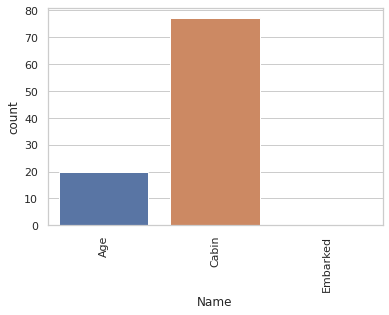

In [34]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

> The bar chart above gives a quick graphical overview of the completeness of the dataset. 

### Finding reason for missing data using a Heatmap

In [37]:
import missingno as msno

<AxesSubplot:xlabel='Name', ylabel='Name'>

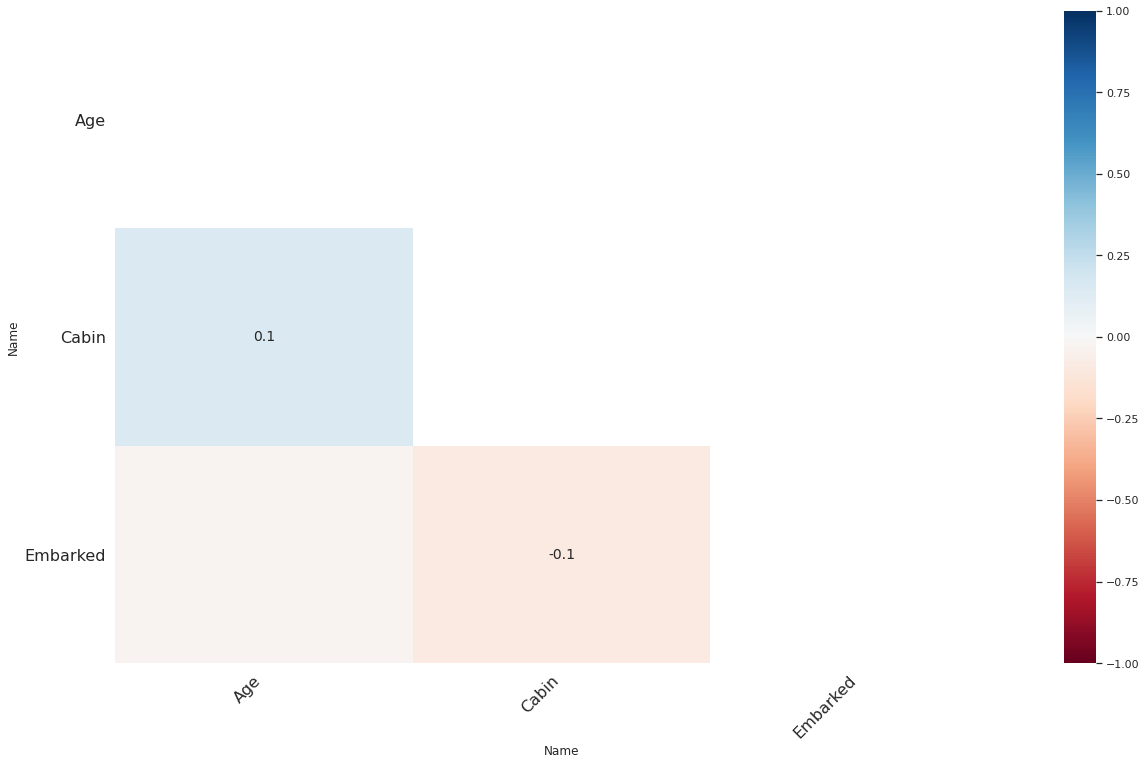

In [39]:
msno.heatmap(train)

> The heatmap function shows that there are no strong correlations between missing values of different features. Low correlations further indicate that the data are Missing at random.

### Treating Missing values

- Deletions
> Deletion means to delete the missing values from a dataset. This is however not recommended as it might result in loss of information from the dataset. We should only delete the missing values from a dataset if their proportion is very small.

- Imputations Techniques
> Imputation refers to replacing missing data with substituted values.There are a lot of ways in which the missing values can be imputed depending upon the nature of the problem and data.

**Basic Imputation Techniques :**
- Imputating with a constant value
- Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located

In [40]:
# imputing with a constant

from sklearn.impute import SimpleImputer
train_constant = train.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

Name
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

### Imputations Techniques for Time Series Problems 

- To understand imputation better lets take another timeseries dataset - *[Air Quality Data in India](https://www.kaggle.com/rohanrao/air-quality-data-in-india)*

**Basic Imputation Techniques :**
- ffill' or 'pad' - Replace NaN s with last observed value
- 'bfill' or 'backfill' - Replace NaN s with next observed value
- Linear interpolation method

In [43]:
city_day = pd.read_csv('./airqua/city_day.csv',parse_dates=True,index_col='Date')
city_day1=city_day.copy(deep=True)
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [45]:
 # Total missing values
city_day_missing = city_day.isnull().sum()

city_day_missing

City              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [46]:
# Percentage of missing values
city_day_missing_per = 100 * city_day.isnull().sum() / len(city_day)
city_day_missing_per

City           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

> There are a lot of missing values and some of the columns like Xylene has more than 50% of the values missing. 

In [49]:
# Imputation using ffill
# Imputing Xylene value

city_day['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

> there are 4 missing values in the Xylene column in above selected part.

In [50]:
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

> We can see that all missing values have been filled with the last observed values.

In [51]:
# Imputation using bfill
# Imputing AQI value

city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [52]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

> We can see that all missing values have been filled with the next observed values.

#### Imputation using Linear Interpolation method
> Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

[Documentaion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [53]:
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [54]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64

### K-Nearest Neighbor Imputation

> The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

[Source](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)

In [58]:
train_knn = train.copy(deep=True)

In [59]:
train_knn['Age'].isnull().sum()

177

In [60]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [61]:
train_knn['Age'].isnull().sum()

0